In [50]:
pip install py-AutoClean

In [51]:
import pandas as pd
from AutoClean import AutoClean
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
data = pd.read_csv('/content/WalmartDataset.csv', encoding='latin-1')

In [53]:
# Step 2: Apply AutoClean
cleaned_data = AutoClean(
    data,
    mode = 'manual',
    missing_num="auto",  # Impute missing numerical data
    missing_categ='auto',  # Impute missing categorical data
    outliers='auto',  # Detect and handle outliers
    duplicates = 'auto',
    extract_datetime = 's',
)

AutoClean process completed in 6.788332 seconds
Logfile saved to: /content/autoclean.log


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from AutoClean import AutoClean

In [55]:
# Convert cleaned data to DataFrame
df_cleaned = cleaned_data.output

In [56]:
df_cleaned

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Day,Month,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.00,41.9136,11,11,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",498.930,3,0.00,70.8169,11,11,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.00,6.8714,16,6,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,498.930,5,0.45,-39.7241,18,10,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.20,2.5164,18,10,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.20,4.1028,23,1,2014
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.00,15.6332,3,3,2017
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.20,19.3932,3,3,2017
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.00,13.3200,3,3,2017


# **discriptive data analysis**

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define color palettes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def generate_dynamic_insights(df, column):
    """
    Generates automated business insights based on categorical distributions.
    """
    unique_values = df[column].nunique()
    total_values = len(df[column])
    top_category = df[column].value_counts().idxmax()
    top_category_percentage = df[column].value_counts(normalize=True).iloc[0]

    # Determine insights based on data patterns
    insights = []

    if unique_values > total_values * 0.5:
        insights.append(f"{column} appears to be a unique identifier. It is not useful for aggregation but can be used for tracking trends like customer retention and fraud detection.")

    if top_category_percentage > 0.5:
        insights.append(f"{column} is dominated by one category ({top_category}, {top_category_percentage:.1%}). Consider diversifying products or marketing efforts to create a balanced market.")

    if unique_values > 50 and top_category_percentage < 0.05:
        insights.append(f"{column} has a high number of unique categories with no clear dominance. Clustering techniques (e.g., K-Means) can help identify meaningful groups.")

    if unique_values > 5 and top_category_percentage < 0.3:
        insights.append(f"{column} has a well-distributed set of categories. Investigate potential correlations between {column} and key business metrics like revenue or sales.")

    if (df[column].value_counts(normalize=True) < 0.01).sum() > unique_values * 0.5:
        insights.append(f"{column} contains many low-frequency categories. Identify if these represent niche products, seasonal trends, or potential data errors.")

    if unique_values < total_values * 0.05:
        insights.append(f"{column} likely represents key business attributes such as product types or customer segments. Use this to optimize inventory and targeted marketing.")

    return "\n".join(insights) if insights else f"{column} contains meaningful business insights. Further analysis can help optimize business strategies."

def plot_top_categorical_counts_with_dynamic_insights(df):
    """
    Plots the top 20 categories based on count.
    Uses:
    - Pie charts for categorical columns with exactly 3 unique classes.
    - Bar charts for other categorical columns.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns

    for column in categorical_columns:
        category_counts = df[column].value_counts().nlargest(10)

        plt.figure(figsize=(10, 5))

        if len(df[column].unique()) == 3:  # Use pie chart if exactly 3 unique categories
            plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=LIGHT_COLORS)
            plt.title(f"Distribution of {column} (Count)")

        else:  # Use bar chart for all other cases
            sns.barplot(y=category_counts.index, x=category_counts.values, palette=DARK_COLORS + LIGHT_COLORS)
            plt.xlabel("Count")
            plt.ylabel(column)
            plt.title(f"Top 10 {column} Categories (by Count)")

        # Generate insights and recommendations
        insight_text = generate_dynamic_insights(df, column)
        plt.figtext(0.5, -0.25, insight_text, wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        plt.tight_layout()
        plt.show()

def plot_top_numerical_insights(df):
    """
    Analyzes numerical data and visualizes only meaningful distributions.
    - Filters out ID-like columns.
    - Uses histograms, line plots, and bar charts dynamically.
    """
    numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Remove ID-like columns (those with mostly unique values)
    filtered_numerical_columns = [col for col in numerical_columns if df[col].nunique() / len(df) < 0.9]

    for column in filtered_numerical_columns:
        plt.figure(figsize=(10, 5))

        # # Use different types of charts based on the data
        # if df[column].nunique() > 50:  # Continuous data -> line chart
        #     sns.lineplot(data=df[column], color=DARK_COLORS[0])
        #     plt.title(f"Trend of {column} Over Time")
        #     plt.xlabel("Index")
        #     plt.ylabel(column)

        if df[column].nunique() > 5 and df[column].nunique() < 50:  # Moderate categories -> bar chart
            sns.barplot(x=df[column].value_counts().index[:10], y=df[column].value_counts().values[:10], palette=DARK_COLORS + LIGHT_COLORS)
            plt.title(f"Top 10 Values of {column}")
            plt.xlabel(column)
            plt.ylabel("Count")

        else:  # Discrete numeric values -> histogram
            sns.histplot(df[column], bins=10, kde=True, color=DARK_COLORS[1])
            plt.title(f"Distribution of {column}")
            plt.xlabel(column)
            plt.ylabel("Frequency")

        # Insights and recommendations
        plt.figtext(0.5, -0.25, f"Insight: {column} shows meaningful business trends.\nRecommendation: Use this to predict future sales, demand, or operational efficiency.",
                    wrap=True, horizontalalignment='center', fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))

        plt.tight_layout()
        plt.show()

# Example usage
# plot_top_categorical_counts_with_dynamic_insights(df_cleaned)
# plot_top_numerical_insights(df_cleaned)


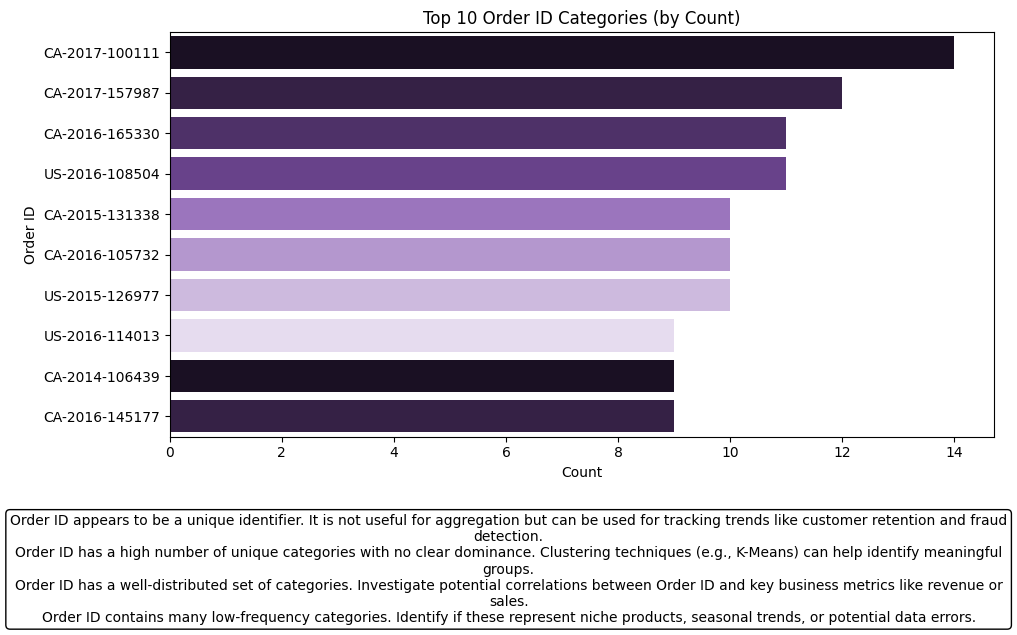

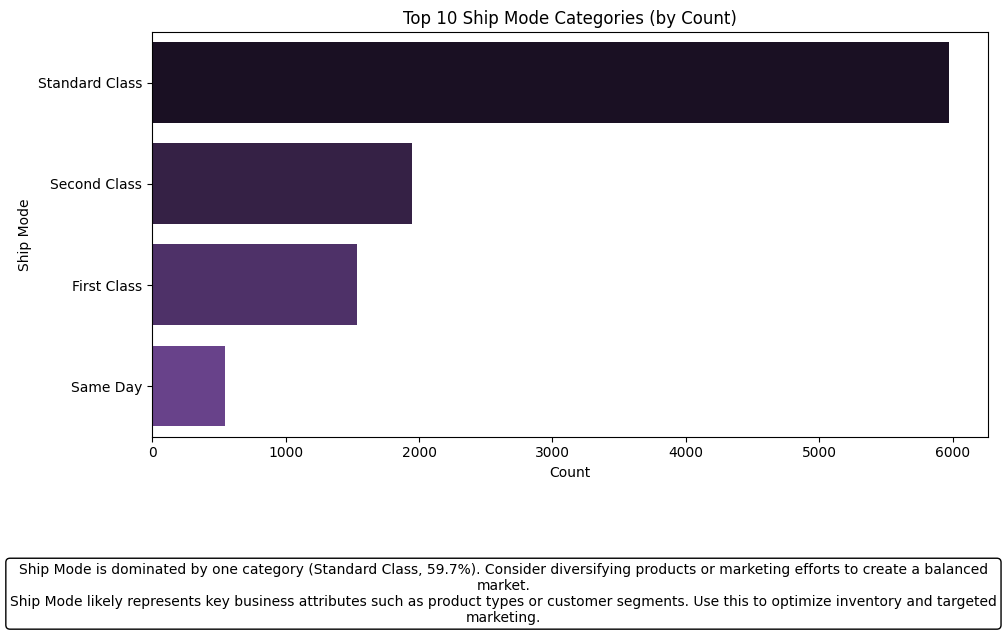

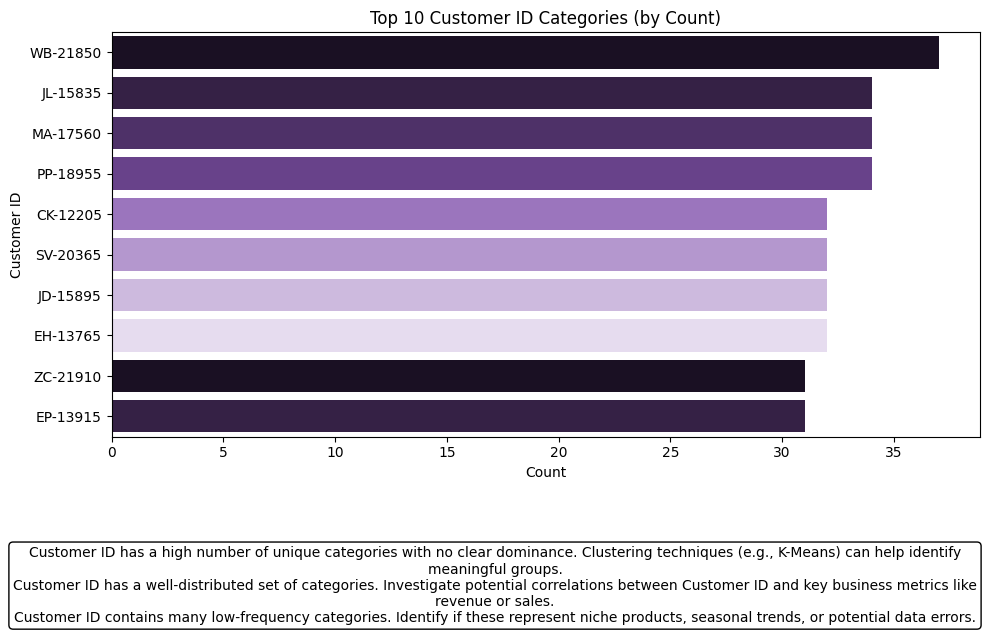

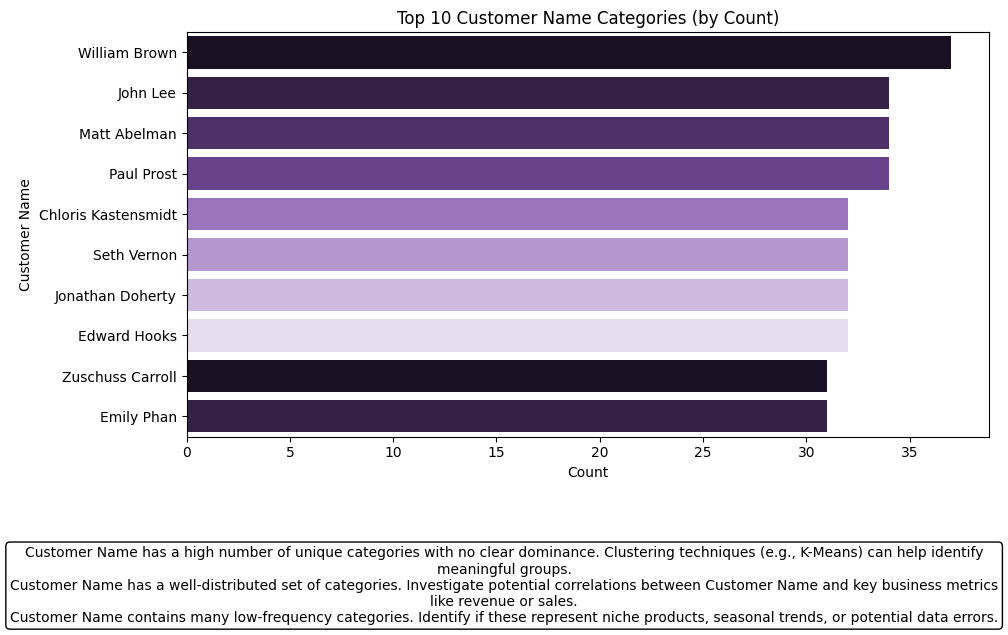

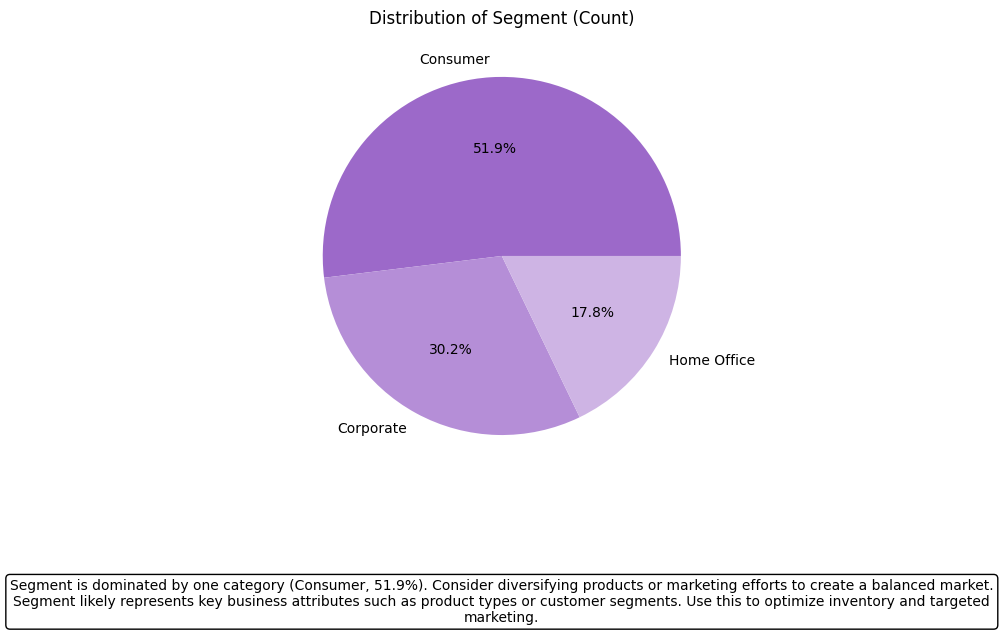

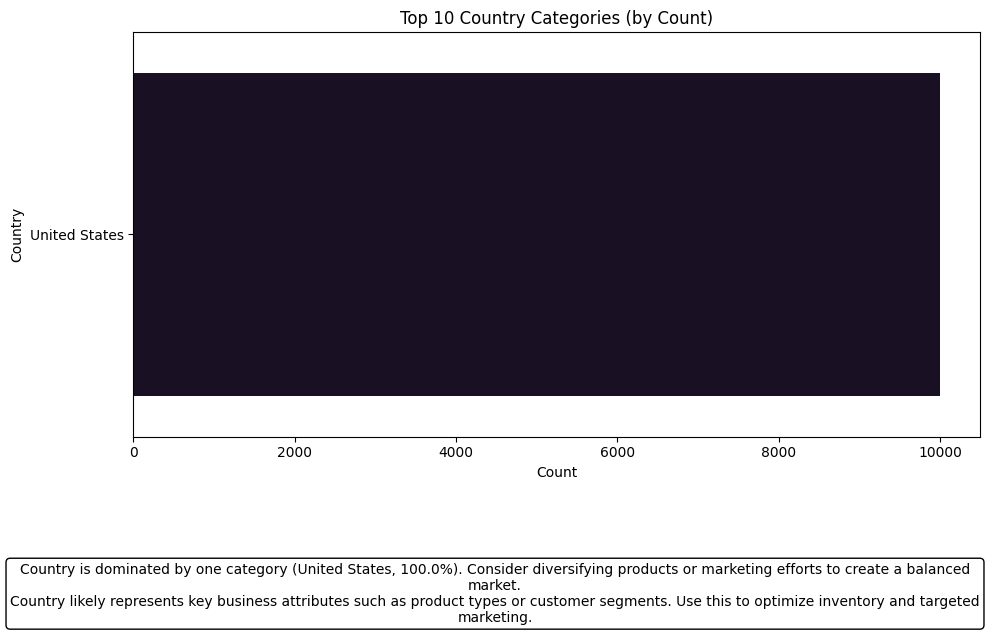

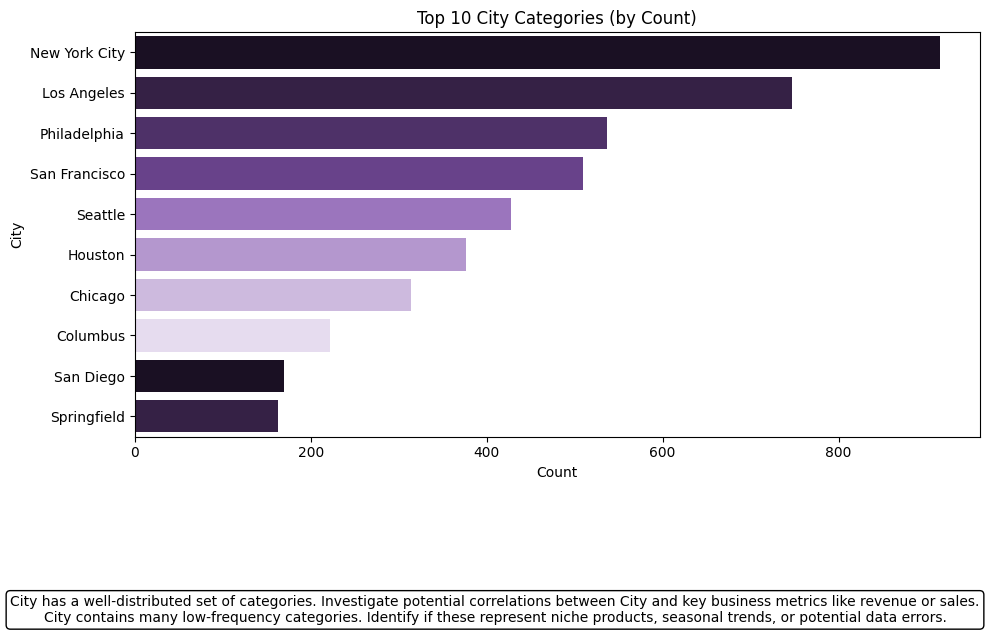

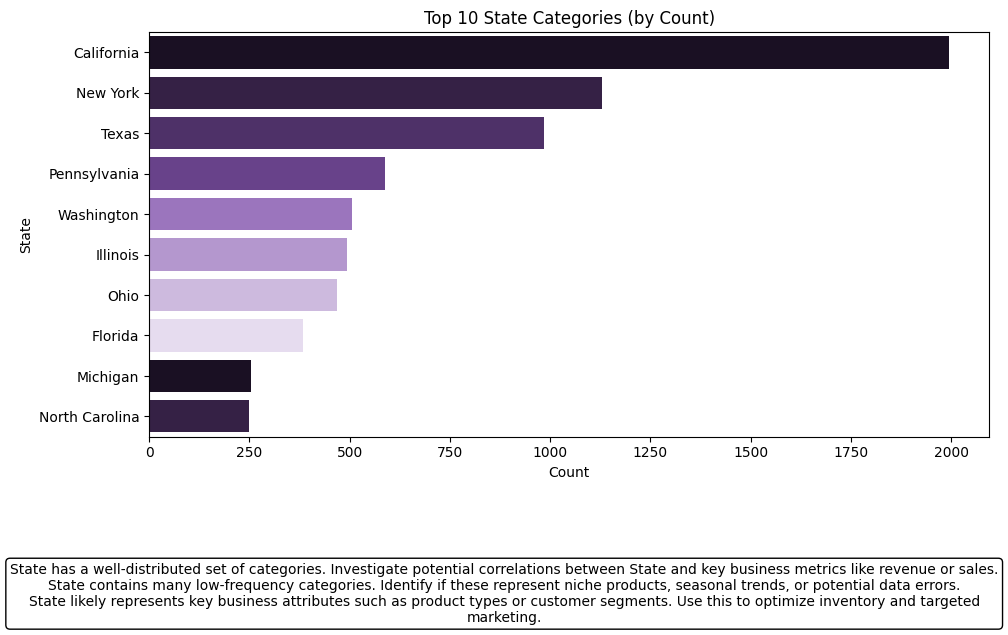

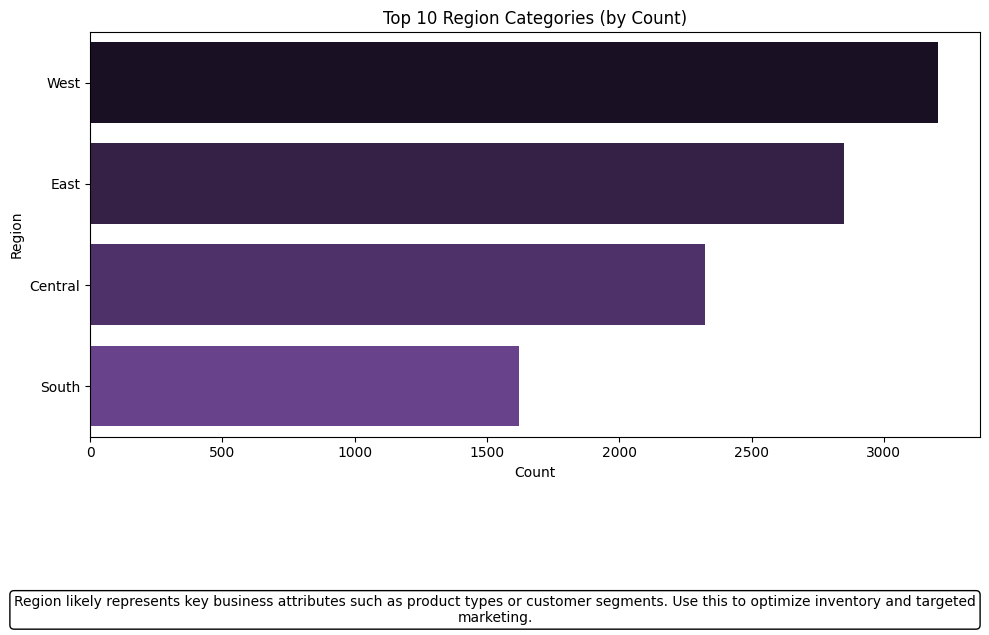

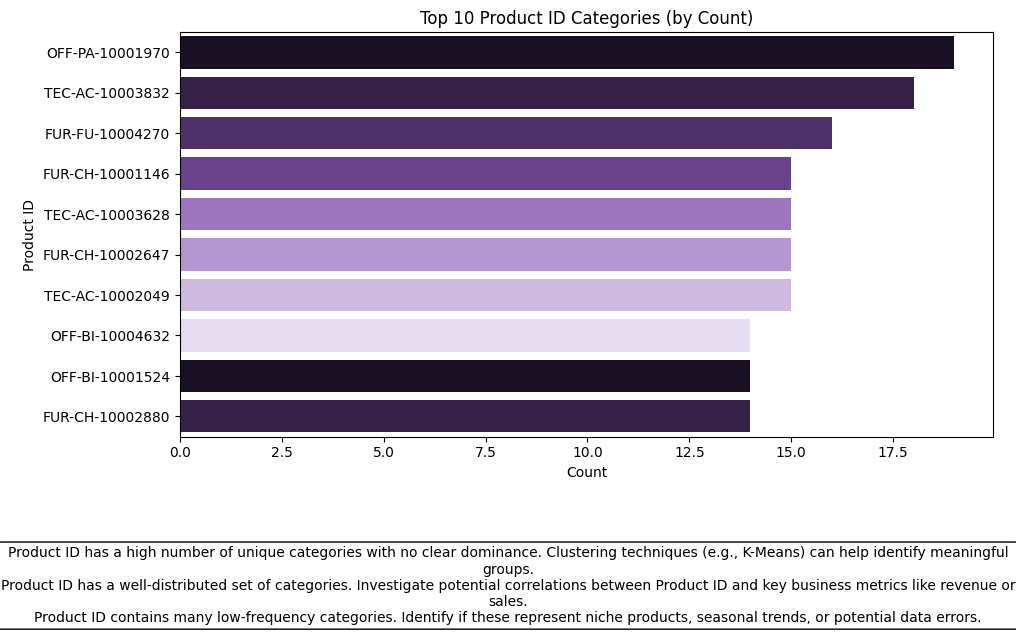

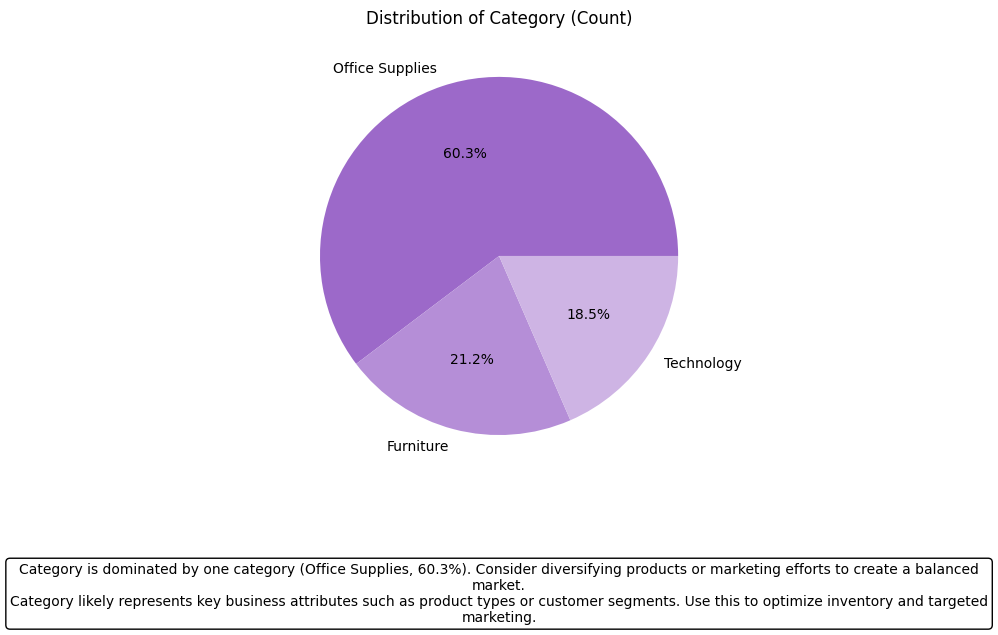

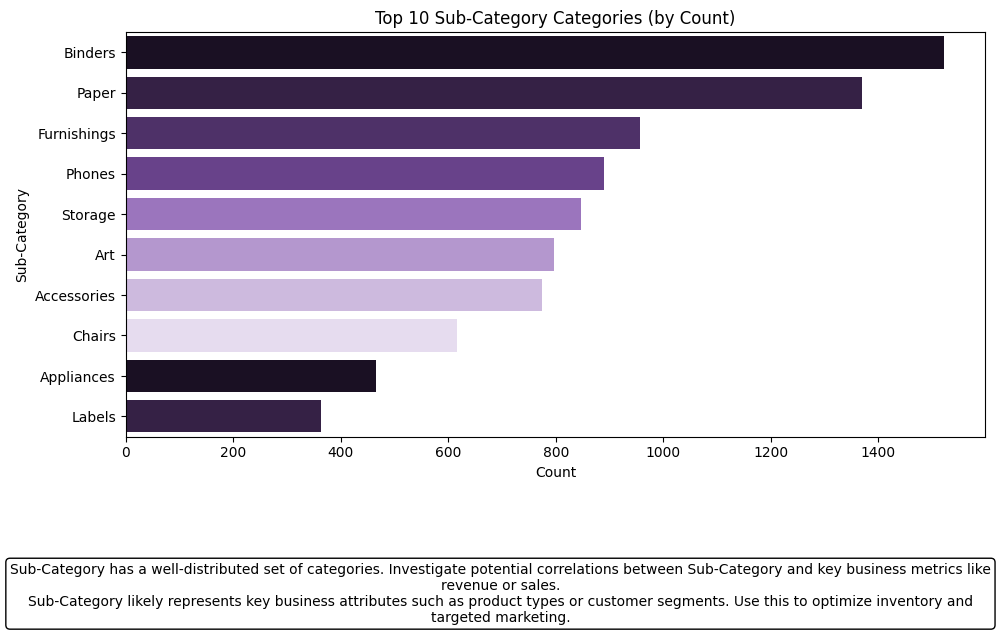

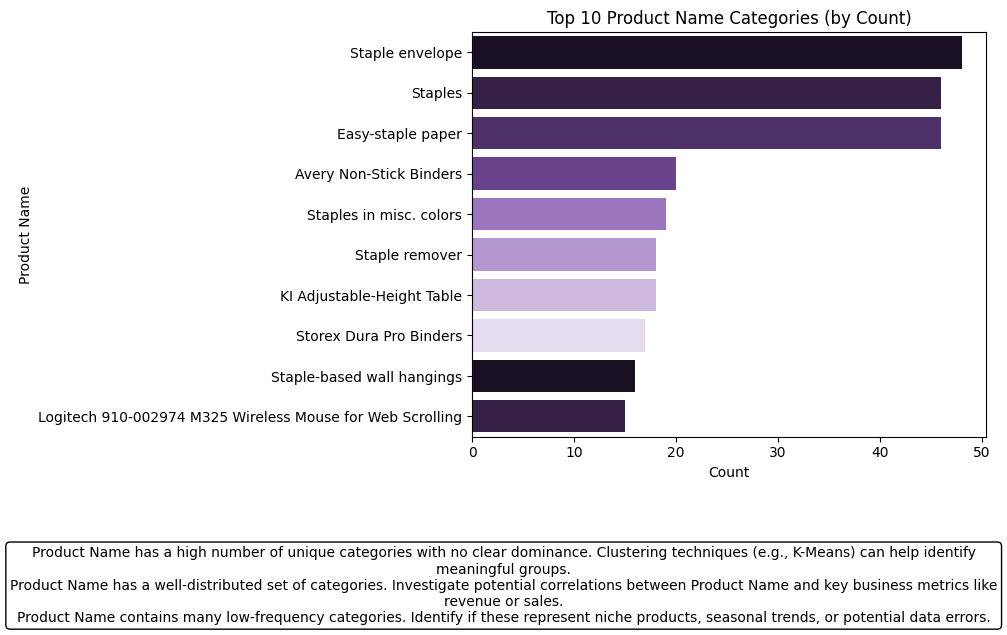

In [58]:
plot_top_categorical_counts_with_dynamic_insights(df_cleaned)


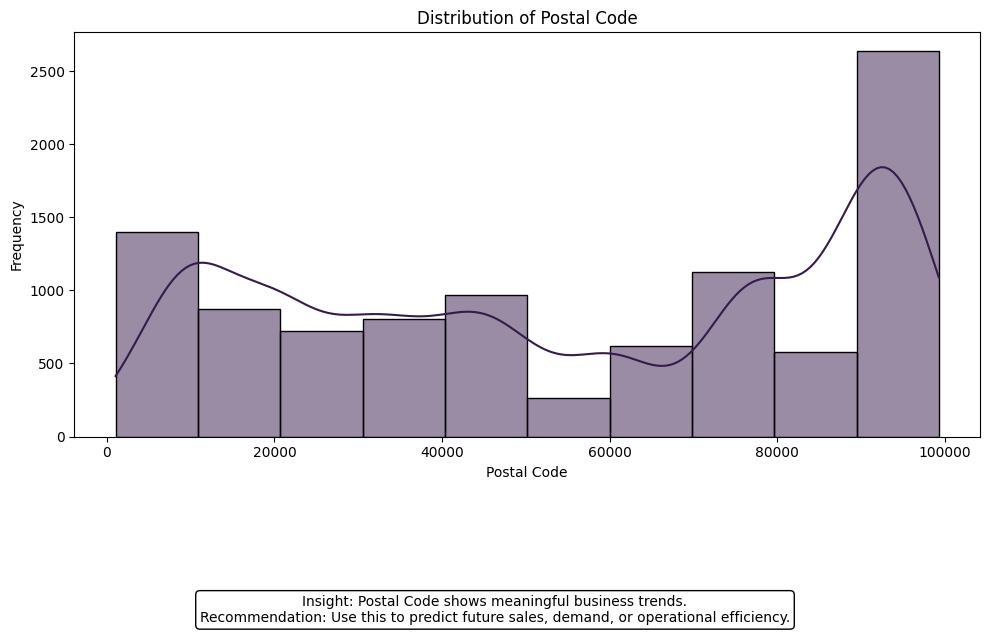

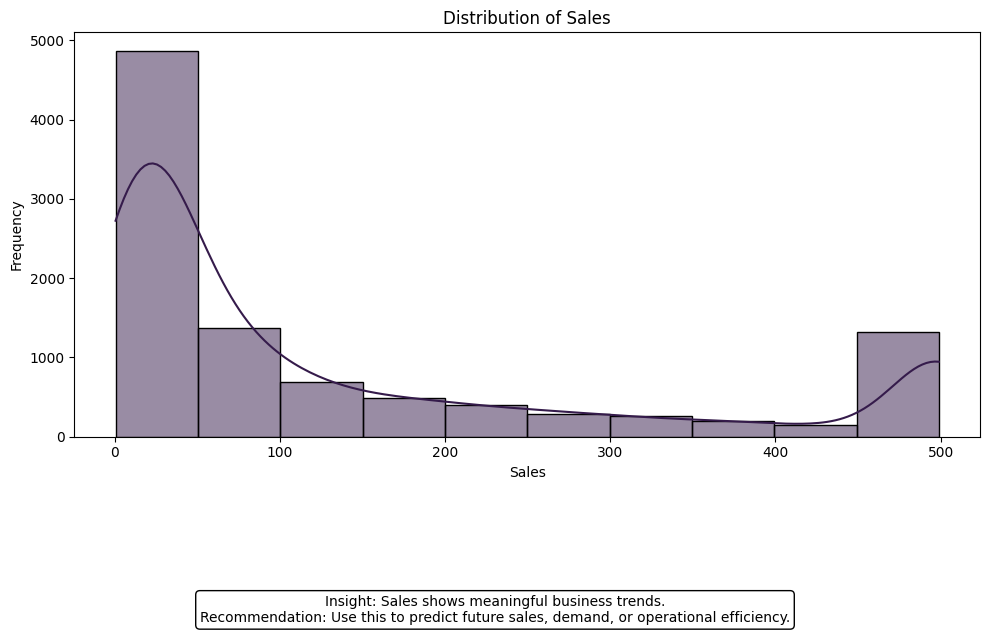

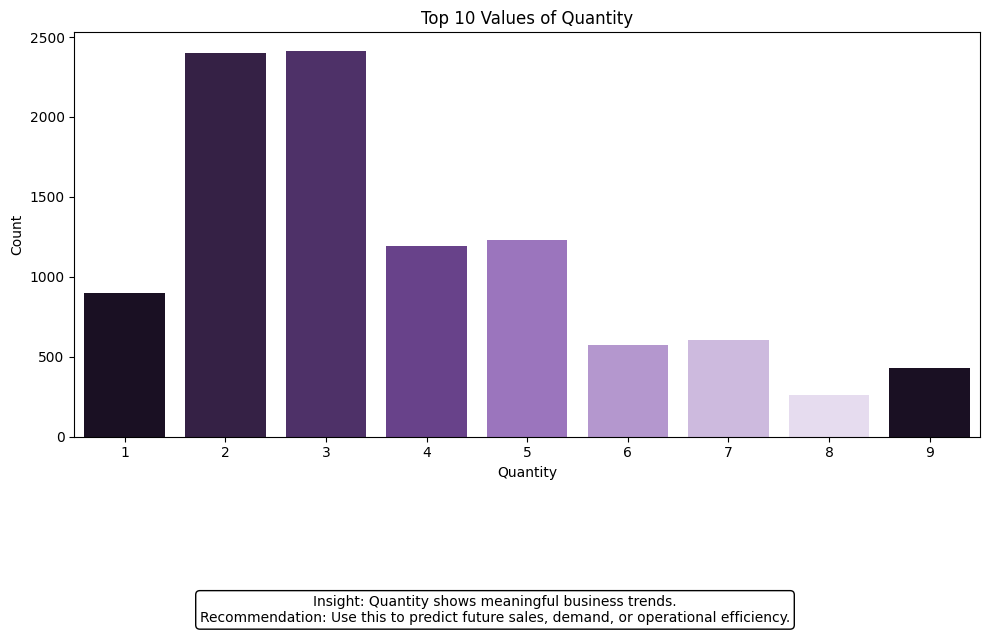

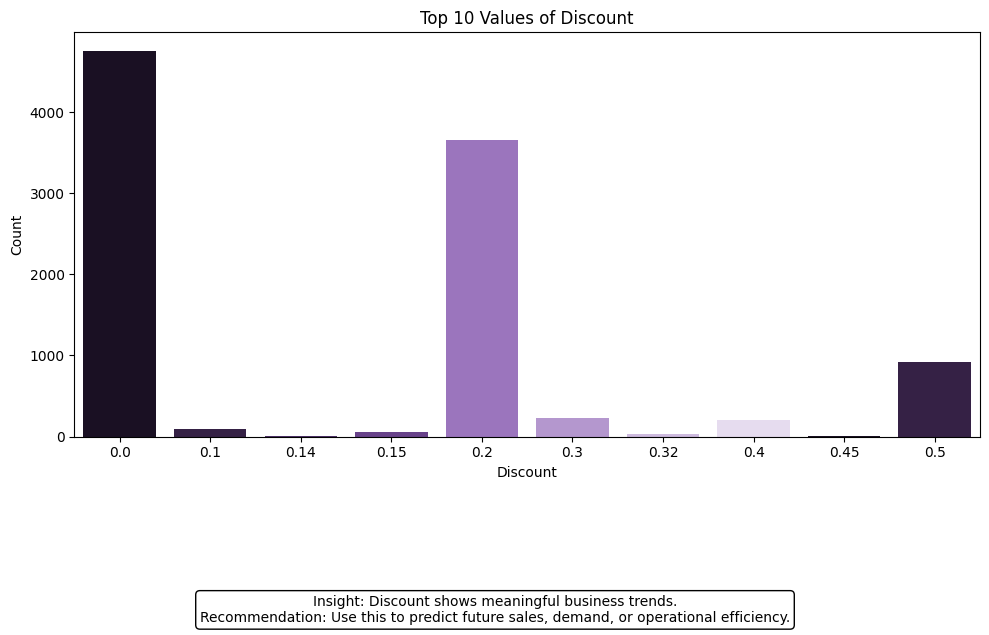

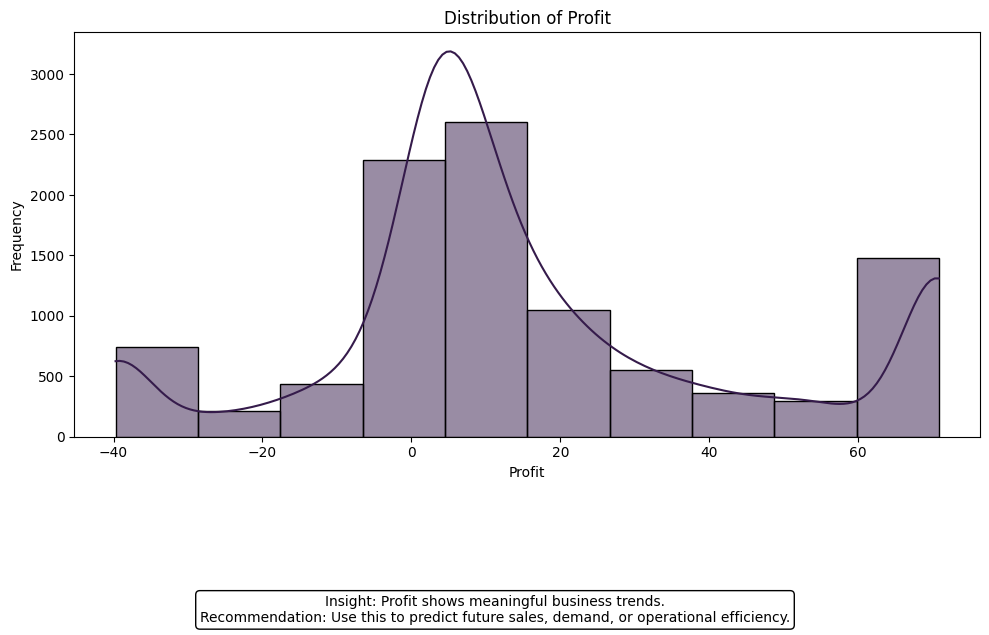

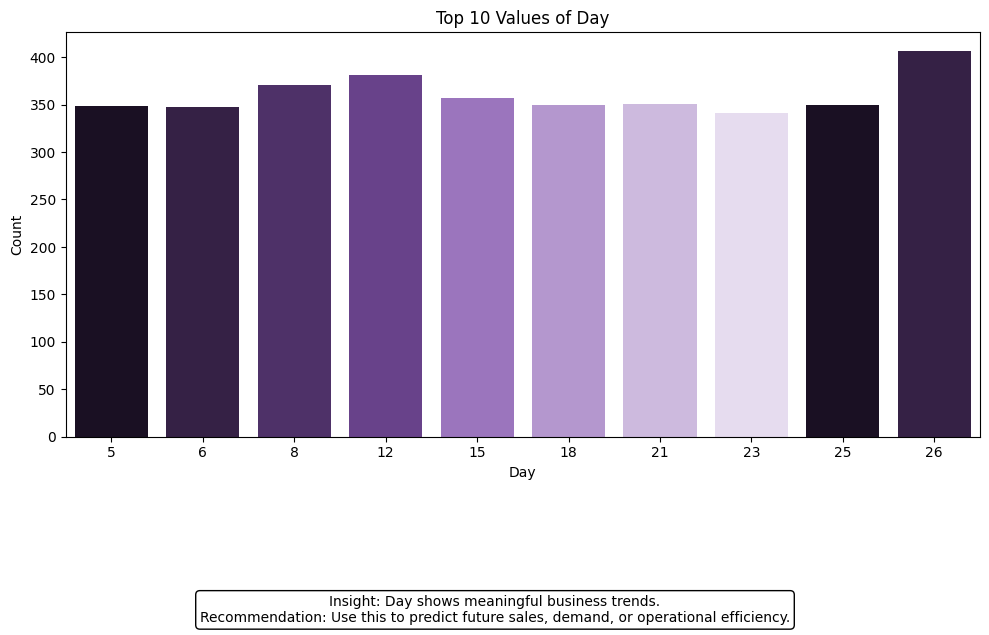

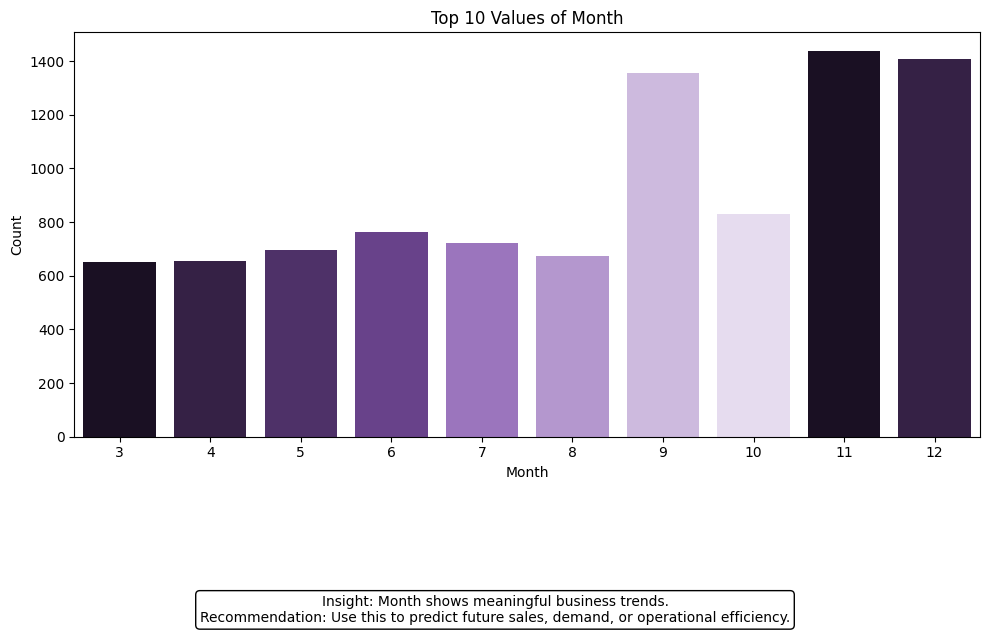

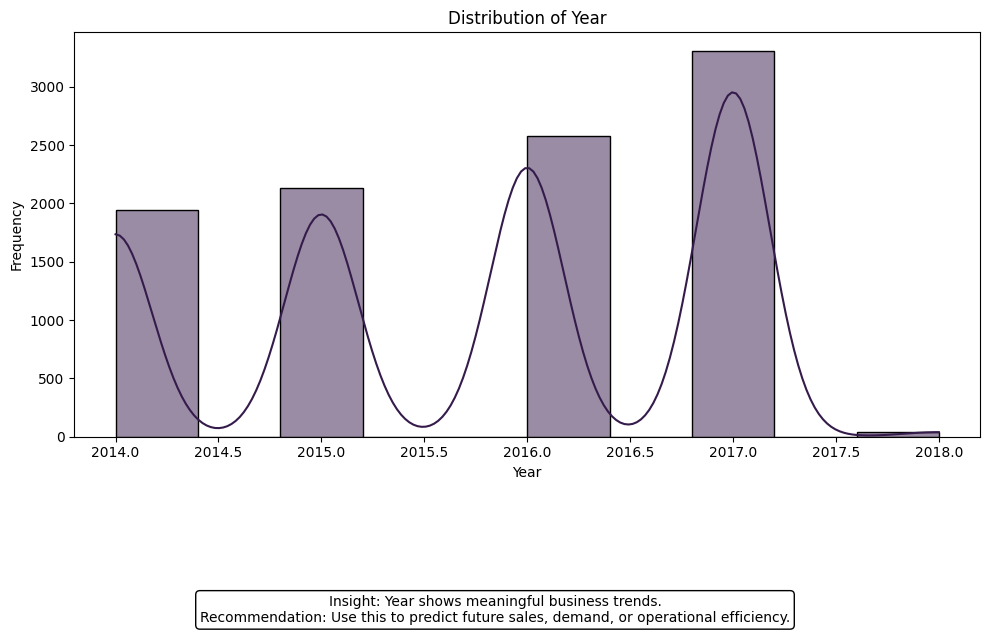

In [59]:
plot_top_numerical_insights(df_cleaned)


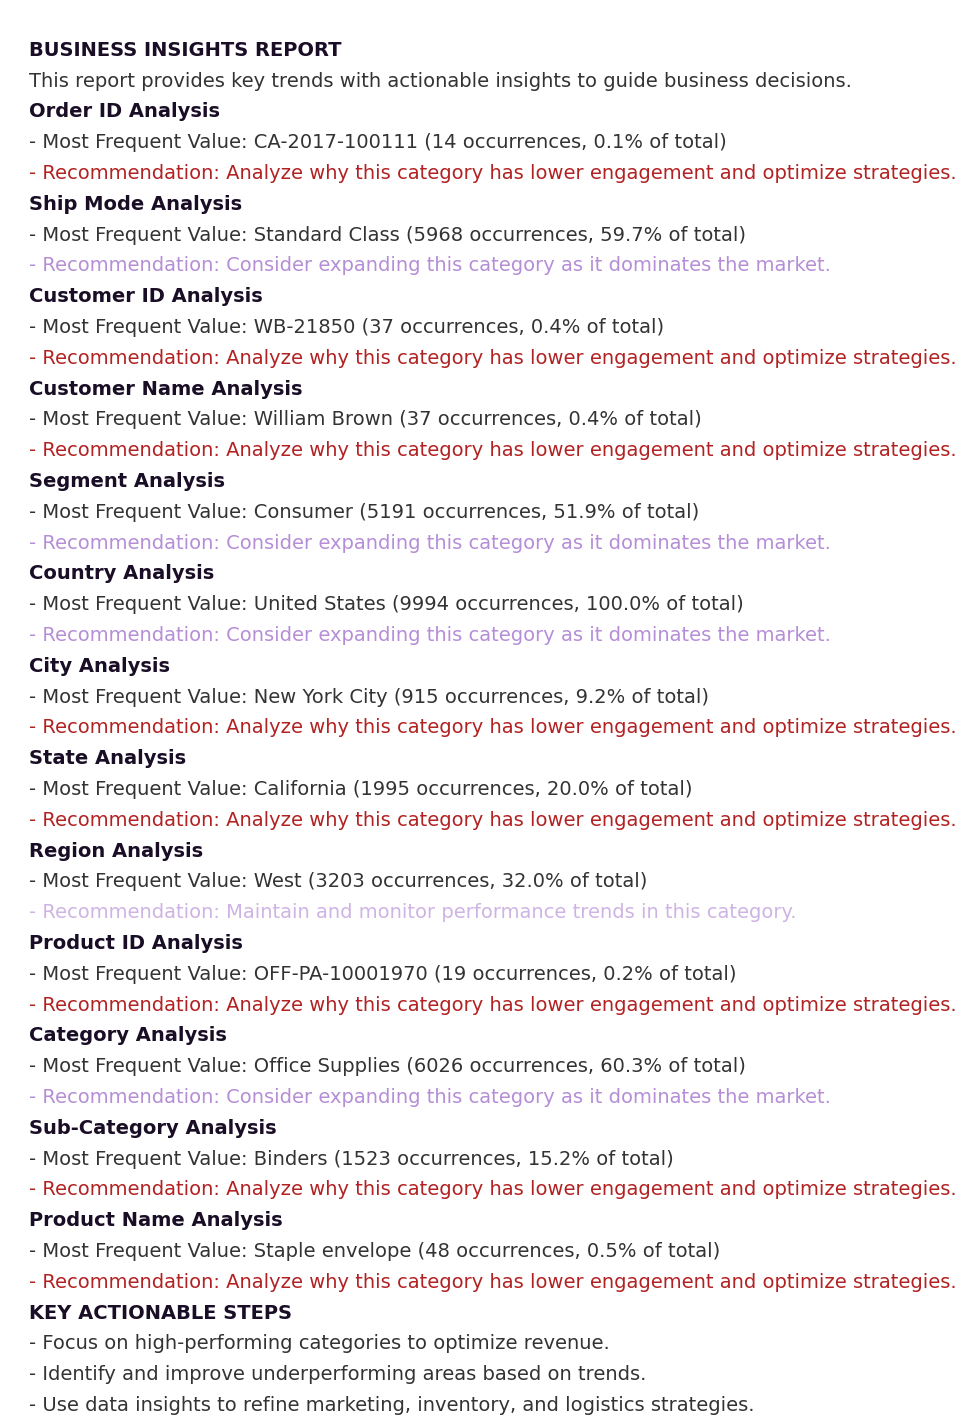

In [60]:
import matplotlib.pyplot as plt
from textwrap import wrap

def generate_summary_report_image(df):
    """
    Generates and displays a structured business insights report with enhanced readability,
    color-coded insights, and numerical breakdowns.

    Parameters:
        df (DataFrame): A Pandas DataFrame containing categorical data.
    """
    categorical_columns = df.select_dtypes(include=['object']).columns
    insights = []

    # Title Section
    insights.append(("BUSINESS INSIGHTS REPORT\n", "#1A0D26", "bold"))
    insights.append(("This report provides key trends with actionable insights to guide business decisions.\n\n\n\n", "#333333", "regular"))

    # Generate insights for each categorical column
    for column in categorical_columns:
        value_counts = df[column].value_counts()
        top_value = value_counts.idxmax()  # Most frequent category
        count = value_counts.max()
        total = len(df)
        percentage = (count / total) * 100

        # Define color coding based on percentage
        if percentage > 50:
            color = "#B58ED7"  # Green for dominant categories
            action = "Recommendation: Consider expanding this category as it dominates the market."
        elif percentage > 20:
            color = "#CEB4E4"  # Orange for balanced categories
            action = "Recommendation: Maintain and monitor performance trends in this category."
        else:
            color = "#B22222"  # Red for underperforming categories
            action = "Recommendation: Analyze why this category has lower engagement and optimize strategies."

        # Generate formatted insight
        insights.append((f"{column} Analysis", "#1A0D26", "bold"))  # Bold column name
        insights.append((f"- Most Frequent Value: {top_value} ({count} occurrences, {percentage:.1f}% of total)", "#333333", "regular"))
        insights.append((f"- {action}\n", color, "regular"))

    # Key Actionable Steps
    insights.append(("KEY ACTIONABLE STEPS\n", "#1A0D26", "bold"))
    insights.append(("- Focus on high-performing categories to optimize revenue.", "#333333", "regular"))
    insights.append(("- Identify and improve underperforming areas based on trends.", "#333333", "regular"))
    insights.append(("- Use data insights to refine marketing, inventory, and logistics strategies.\n", "#333333", "regular"))

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 8), dpi=100)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)

    # Display text inside the figure with different colors and font weights
    y_position = 0.95
    for text, color, weight in insights:
        wrapped_text = "\n".join(wrap(text, width=90))
        ax.text(
            0.02, y_position, wrapped_text,
            fontsize=14,
            va="top", ha="left",
            family="Times New Roman",
            fontweight=weight,  # Use bold or regular
            linespacing=1.5,
            color=color
        )
        y_position -= 0.05  # Adjust spacing

    # Show the report image
    plt.show()

# Run the improved report
generate_summary_report_image(df_cleaned)


# **Exploratory data analysis**

# **Kernel density plot for understanding variance in the dataset**

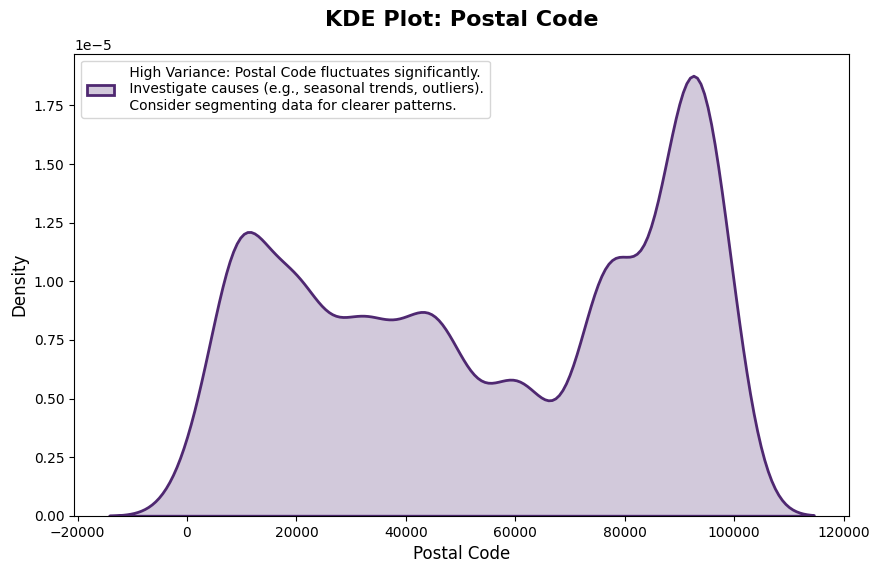

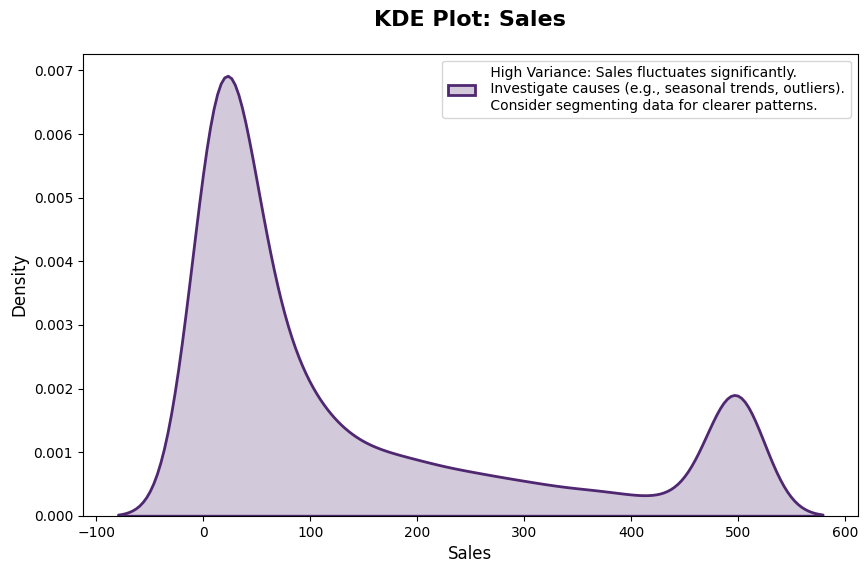

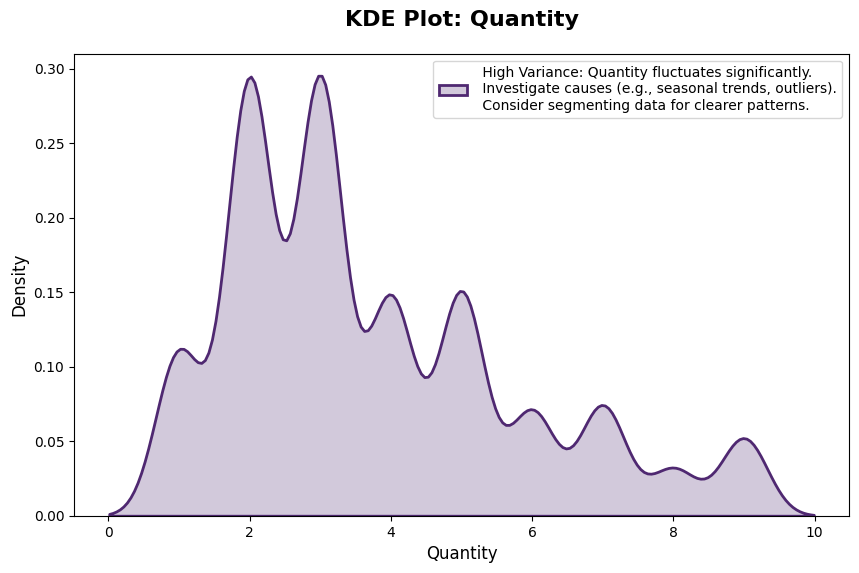

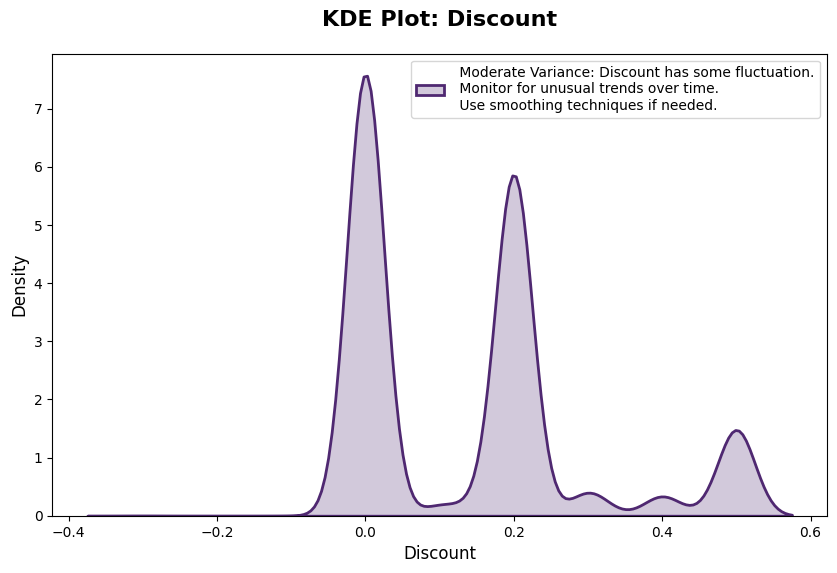

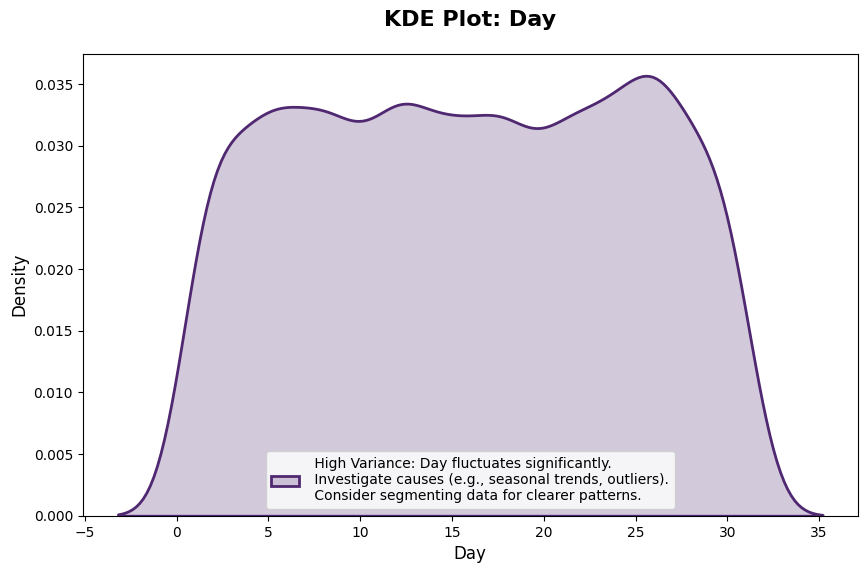

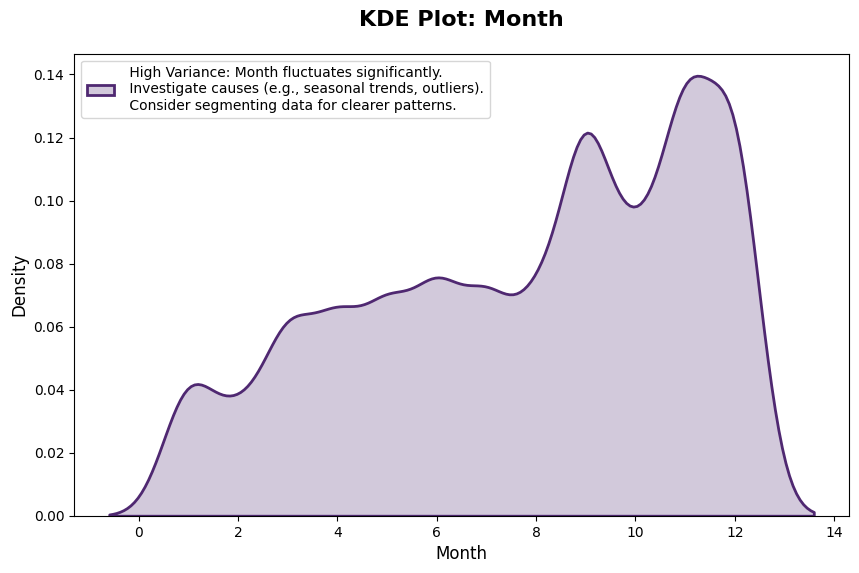

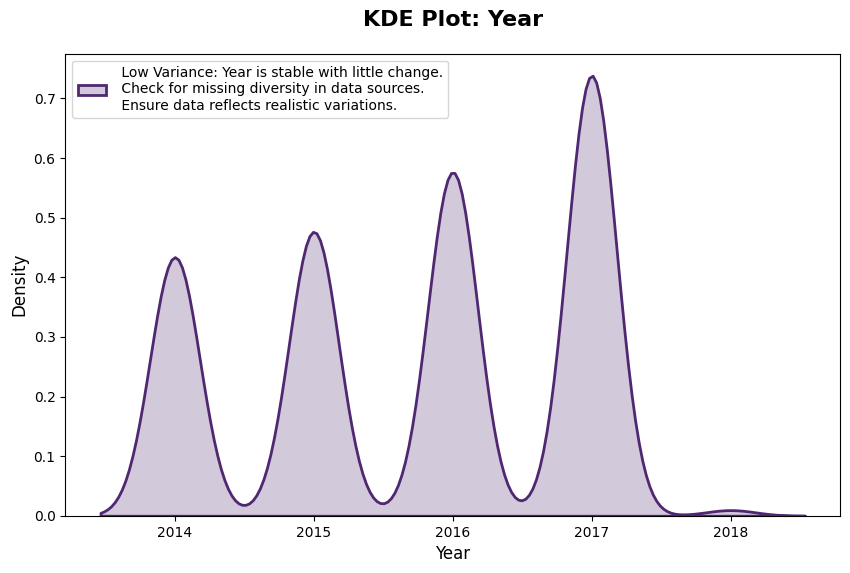

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define color themes
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def is_id_column(df, col_name):
    """
    Detects ID-like columns dynamically based on uniqueness.
    If more than 50% of values are unique, the column is likely an identifier.
    """
    return df[col_name].nunique() > (0.5 * len(df))

def plot_kde_with_insights(df):
    """
    Generates Kernel Density Estimation (KDE) plots for numerical columns,
    filters out ID-like columns, analyzes variance, and annotates insights using a legend.
    """
    numerical_cols = [col for col in df.select_dtypes(include=[np.number]).columns if not is_id_column(df, col)]

    if not numerical_cols:
        print("No suitable numerical columns found for KDE plotting.")
        return

    for col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df[col], shade=True, color=DARK_COLORS[2], linewidth=2, label=f"Distribution of {col}")

        # Calculate variance and standard deviation
        variance = np.var(df[col])
        std_dev = np.std(df[col])

        # Define variance categories dynamically based on column mean
        mean_value = df[col].mean()
        low_threshold = mean_value * 0.05
        high_threshold = mean_value * 0.5

        # Interpret variance levels
        if variance > high_threshold:
            insight = f"High Variance: {col} fluctuates significantly."
            recommendation = f"Investigate causes (e.g., seasonal trends, outliers)."
            action = f"Consider segmenting data for clearer patterns."
        elif variance < low_threshold:
            insight = f"Low Variance: {col} is stable with little change."
            recommendation = f"Check for missing diversity in data sources."
            action = f"Ensure data reflects realistic variations."
        else:
            insight = f"Moderate Variance: {col} has some fluctuation."
            recommendation = f"Monitor for unusual trends over time."
            action = f"Use smoothing techniques if needed."

        # Plot formatting
        plt.title(f"KDE Plot: {col}", fontsize=16, fontweight='bold', pad=20)
        plt.xlabel(col, fontsize=12)
        plt.ylabel("Density", fontsize=12)

        # Add insights as a legend instead of overlapping text
        plt.legend([f" {insight}\n {recommendation}\n {action}"], loc="best", fontsize=10, frameon=True)

        plt.show()

# Example Usage
plot_kde_with_insights(df_cleaned)


# **Correlation Matrix for examining the correlation**

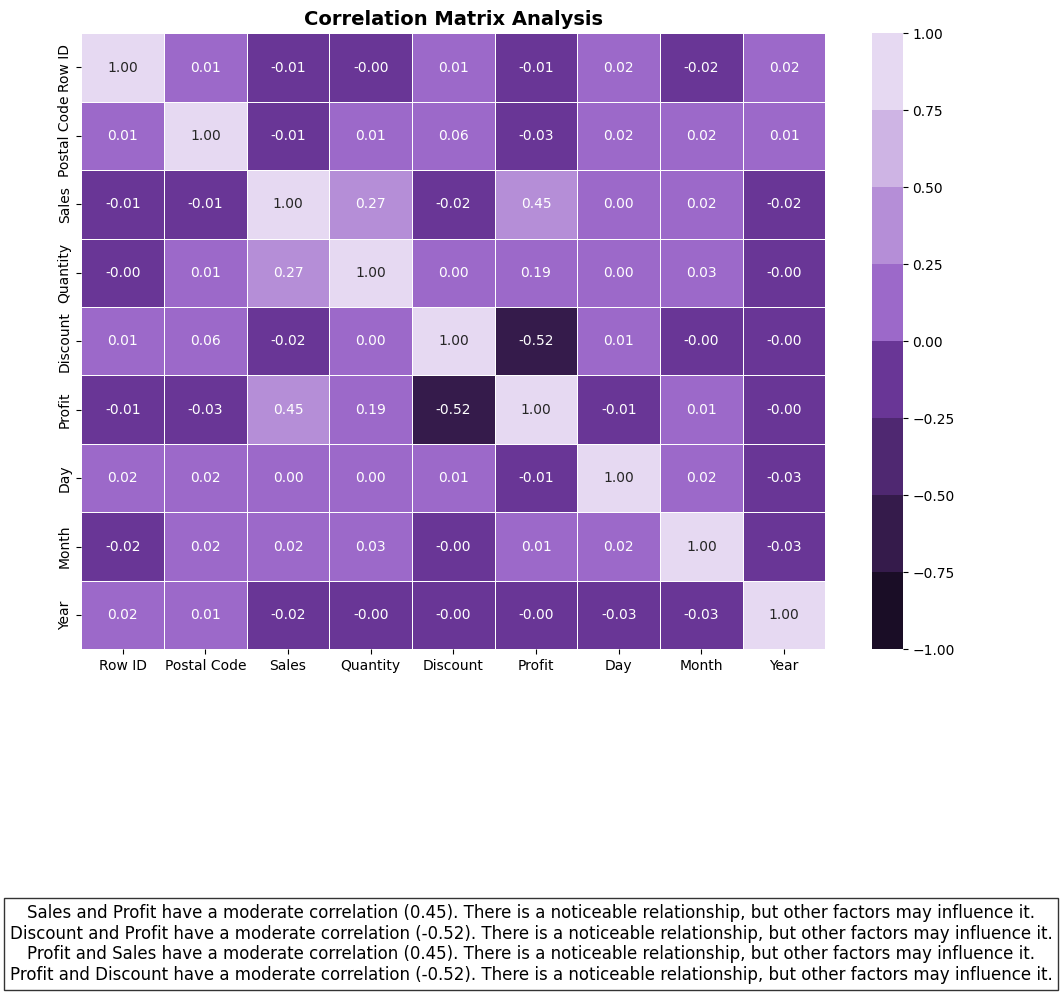

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors
DARK_COLORS = ["#1A0D26", "#351B4B", "#4F2871", "#693696"]
LIGHT_COLORS = ["#9C69C9", "#B58ED7", "#CEB4E4", "#E6D9F2"]

def plot_correlation_matrix(df):
    """
    Plots a correlation matrix with business insights below the graph.
    """
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=[np.number])

    # Compute correlation matrix
    corr_matrix = numerical_df.corr()

    # Define color mapping based on correlation strength
    cmap = sns.color_palette(DARK_COLORS + LIGHT_COLORS, as_cmap=True)

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, vmin=-1, vmax=1)
    plt.title("Correlation Matrix Analysis", fontsize=14, fontweight='bold')

    # Generate Business Insights
    insights = []
    for col1 in corr_matrix.columns:
        for col2 in corr_matrix.columns:
            if col1 != col2:
                corr_value = corr_matrix.loc[col1, col2]
                if corr_value > 0.7:
                    insights.append(f"{col1} and {col2} have a strong positive correlation ({corr_value:.2f}). This suggests that increasing {col1} will likely increase {col2}.")
                elif corr_value < -0.7:
                    insights.append(f"{col1} and {col2} have a strong negative correlation ({corr_value:.2f}). This means when {col1} increases, {col2} tends to decrease.")
                elif 0.3 < corr_value < 0.7 or -0.7 < corr_value < -0.3:
                    insights.append(f"{col1} and {col2} have a moderate correlation ({corr_value:.2f}). There is a noticeable relationship, but other factors may influence it.")

    # Display Insights Below the Graph
    insight_text = "\n".join(insights)
    plt.figtext(0.5, -0.3, insight_text, wrap=True, horizontalalignment='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.show()

# Example Usage:
plot_correlation_matrix(df_cleaned)


# **Predective Analysis**

In [63]:
# print the data types of the cleaned dataset
print(df_cleaned.dtypes)

Row ID                    Int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               Int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  Int64
Discount                float64
Profit                  float64
Day                       Int64
Month                     Int64
Year                      Int64
dtype: object


In [64]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

def forecast_business_metrics(df):
    # Keywords to identify relevant columns
    keywords = [
        "sales", "profit", "revenue", "income", "return", "proceeds", "earnings",
        "yield", "incoming", "gain", "transactions", "deals", "purchases",
        "auctions", "bargains", "trades", "buys", "negotiations"
    ]

    # Identify columns dynamically
    target_cols = [col for col in df.columns if any(keyword in col.lower() for keyword in keywords)]

    if not target_cols:
        print("No relevant financial columns found. Forecasting is skipped.")
        return

    # Create a Date column from Year, Month, Day
    df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

    # Aggregate data monthly
    df = df.groupby(pd.Grouper(key='Date', freq='M'))[target_cols].sum().reset_index()

    for col in target_cols:
        plt.figure(figsize=(12, 6))  # Separate figure for each metric

        # Prepare data for Prophet
        data = df[['Date', col]].rename(columns={'Date': 'ds', col: 'y'})

        # Fit the Prophet model
        model = Prophet()
        model.fit(data)

        # Create future dates
        future = model.make_future_dataframe(periods=12, freq='M')
        forecast = model.predict(future)

        # Calculate forecast accuracy
        actual_values = data['y'].values
        predicted_values = model.predict(data)['yhat'].values
        mape = mean_absolute_percentage_error(actual_values, predicted_values) * 100
        accuracy = 100 - mape  # Accuracy is 100 - MAPE

        # Plot results
        plt.plot(data['ds'], data['y'], label=f"Historical {col}", color="#B58ED7")
        plt.plot(forecast['ds'], forecast['yhat'], label=f"Forecast {col} (Accuracy: {accuracy:.2f}%)", color="#693696" , linestyle= 'dotted')

        plt.title(f"{col} Forecast")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend(loc="best")
        plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphy5mpax5/0g2z5neq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphy5mpax5/uus0nwo7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11320', 'data', 'file=/tmp/tmphy5mpax5/0g2z5neq.json', 'init=/tmp/tmphy5mpax5/uus0nwo7.json', 'output', 'file=/tmp/tmphy5mpax5/prophet_modeldichsj3y/prophet_model-20250301041645.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


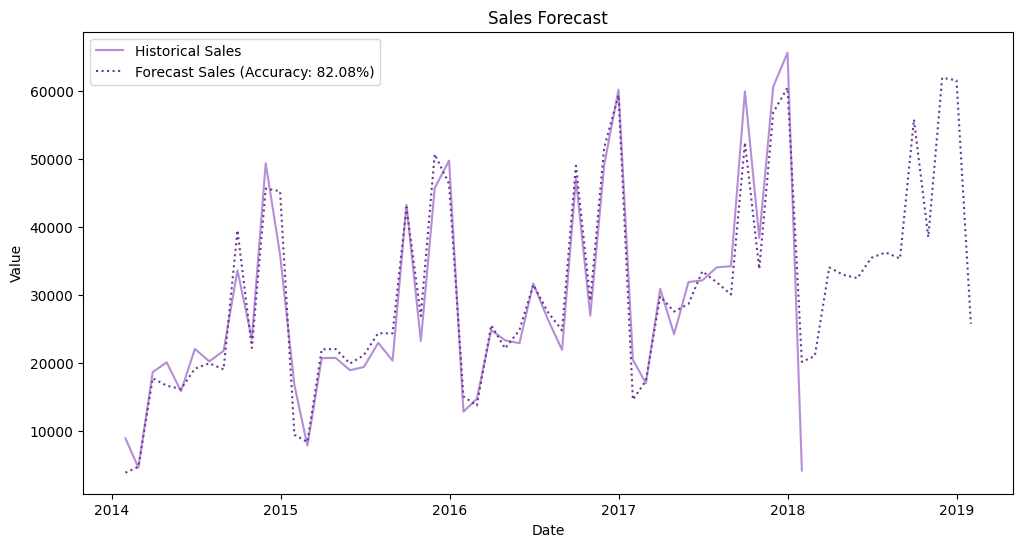

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphy5mpax5/dn3r33n7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphy5mpax5/cx1wghct.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15697', 'data', 'file=/tmp/tmphy5mpax5/dn3r33n7.json', 'init=/tmp/tmphy5mpax5/cx1wghct.json', 'output', 'file=/tmp/tmphy5mpax5/prophet_model4cweolfo/prophet_model-20250301041646.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:16:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:16:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


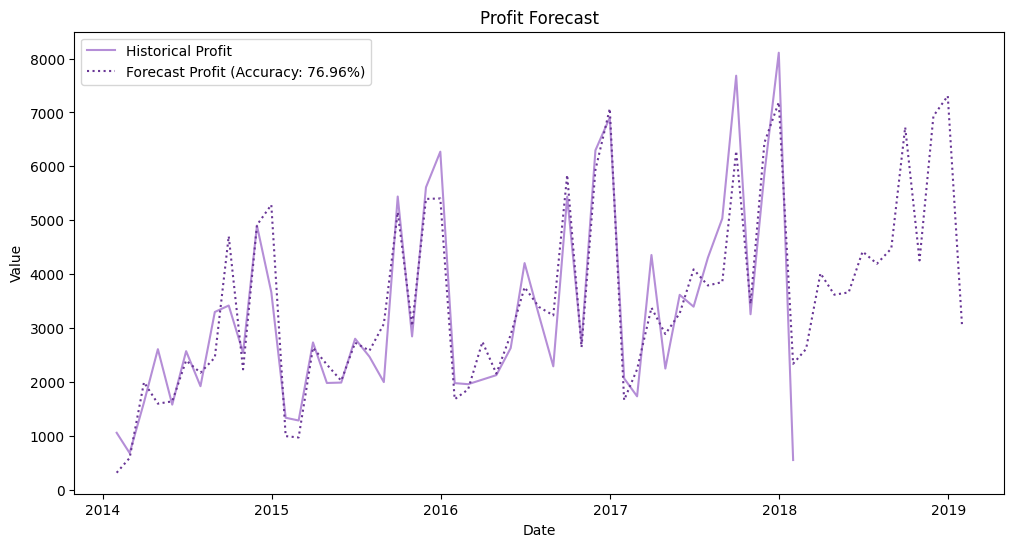

In [79]:
forecast_business_metrics(df_cleaned)